In [1]:
import pandas as pd

In [24]:
sale_data_path="../datasets/competitive-data-science-predict-future-sales/"
def load_data(path):
    return pd.read_csv(path)

train=load_data(sale_data_path+"sales_train.csv")
test=load_data(sale_data_path+"test.csv").set_index('ID')
items = load_data(sale_data_path+"items.csv")
item_categories = load_data(sale_data_path+"item_categories.csv ")
shops = load_data(sale_data_path+"shops.csv ")


In [25]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [26]:
test


,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


In [19]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [17]:

item_categories.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [18]:

shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [29]:
# find the items which are new or not in train

#new_items_len= len(total item in test-intersection item from train set)
new_item = len( set(test.item_id)-set(test.item_id).intersection(set(train.item_id)))

In [30]:
new_item

363

In [34]:
# check for missing values
# check using isnull().sum()
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [35]:
test.isnull().sum()

shop_id    0
item_id    0
dtype: int64

In [37]:
# no null values in both test and train

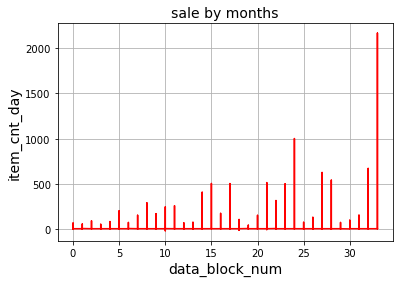

In [44]:
import matplotlib.pyplot as plt
sale_by_month =plt.plot(train["date_block_num"],train["item_cnt_day"], color='red')
plt.title('sale by months', fontsize=14)
plt.xlabel('data_block_num', fontsize=14)
plt.ylabel('item_cnt_day', fontsize=14)
plt.grid(True)
plt.show()

In [46]:
grk= train.groupby('date_block_num')

In [53]:
sale_by_months=grk['item_cnt_day'].sum()

<AxesSubplot:xlabel='date_block_num'>

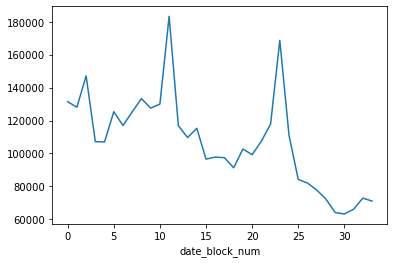

In [54]:
sale_by_months.plot()